# EDA

In [3]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import seaborn as sns

import statsmodels.formula.api as sm
import missingno
import statsmodels.formula.api as sm

from matplotlib.lines import Line2D

import datetime
import re
from langdetect import detect

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (13, 8) 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Ebay corpus

In [230]:
ebay = pd.read_csv('ebay.csv',index_col=0) #load data
ebay

,title,description
1,"Google Hacking for Penetration Testers, Volume 1","Google, the most popular search engine worldwi..."
2,"Hacking Roomba: ExtremeTech, Tod E. Kurt, Good...",The Jetsons would be proud! A gizmo as cool as...
3,OURS TO HACK AND TO OWN By Emma Jane Kirby,Real democracy and the Internet are not mutual...
4,Hacking : The Hacking for Beginners Guide to C...,Are You Looking To Learn About Hacking & Infor...
5,Spotify Premium Account Lifetime New Account o...,Spotify Premium Lifetime account for a new acc...
...,...,...
96,"email list USA, USA consumer email list, USA b...","Email list USA, USA consumer email list, USA b..."
97,"Email DATABASE List New Business Marketing,wor...","Email Database to increase your customers, pro..."
98,Funimation Premium Account Subscription | Life...,Terms Of Service\nSharing or reselling is forb...
99,Pokemon Account Go Level 35 - 36 Premium - Gym...,"Level 35-36 Premium Account\n✔ Good account, N..."


### Onion corpus

In [4]:
df = pd.read_csv('dark_web_market_data_merged.csv',index_col=0) #load data
print(df.shape)
df


(28546, 17)


,link_product,category,sub_category,price,title,vendor,link_vendor,description,views,market,sold,date,vendor_level,vendor_trust,terms,origin_country,last_seen
0,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Online Businesses,Various Logins,EUR 8,timfuck.treasureislandmedia.com Porn Premium A...,enjoymyaccounts,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,"The gay men here are of the manly variety, wit...",146.0,whm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Online Businesses,Various Logins,EUR 399,10 UK bet365 verified accounts,cardpass,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,10 UK bet365 verified accounts,177.0,whm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Online Businesses,Various Logins,USD 5,Masterclass All Access Plan + Annual Pass + Au...,proseller,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Masterclass All Access Plan + Annual Pass + Au...,27.0,whm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Online Businesses,Other Fraud Related,USD 28,Canada PASSPORT PSD TEMPLATE 19 LAYERS SCAN,empireshop,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,This listing include very very high quality NE...,119.0,whm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Online Businesses,Dumps,USD 10,Pokebir.com Database (Plaintext),drunkdragon,http://76p5k6gw25l5jpy7ombo2m7gt4zppowbz47sizv...,Pokebir.com Database (Plaintext)\n\nWhy Buy fr...,149.0,whm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31366,http://hydra3rudf3j4hww.onion/product/225281,NaN,NaN,1000 RUB,"ПРОБИВ ЛИЧНОСТИ (уголовка, административка)",КЕКЕРМИКИШМАЛЬ,http://hydra3rudf3j4hww.onion/market/12428/pro...,"пробив личности на судимости, уголовные наказа...",NaN,hydra,NaN,NaN,750,4.8,NaN,NaN,NaN
31367,http://hydra3rudf3j4hww.onion/product/107561,NaN,NaN,2000 RUB,Взлом почты Mail.ru,"Zolton [взлом почты от 1000р, пробив от 100р,...",http://hydra3rudf3j4hww.onion/market/6686/profile,Пароль при взломе не меняется!\nСрок выполнени...,NaN,hydra,NaN,NaN,72,4.8,NaN,NaN,NaN
31368,http://hydra3rudf3j4hww.onion/product/218388,NaN,NaN,1000 RUB,база всех домофонов москвы,BLACK KENT,http://hydra3rudf3j4hww.onion/market/12999/pro...,Всё домофоны москвы,NaN,hydra,NaN,NaN,212,4.8,NaN,NaN,NaN
31369,http://hydra3rudf3j4hww.onion/product/159269,NaN,NaN,6000 RUB,Ⴘдаленная настройка на анонимность ❄,Black Gallery corp.,http://hydra3rudf3j4hww.onion/market/9103/profile,Наши преимущества перед другими магазинами:\nВ...,NaN,hydra,NaN,NaN,424,4.8,NaN,NaN,NaN


### Somewhat sparse 

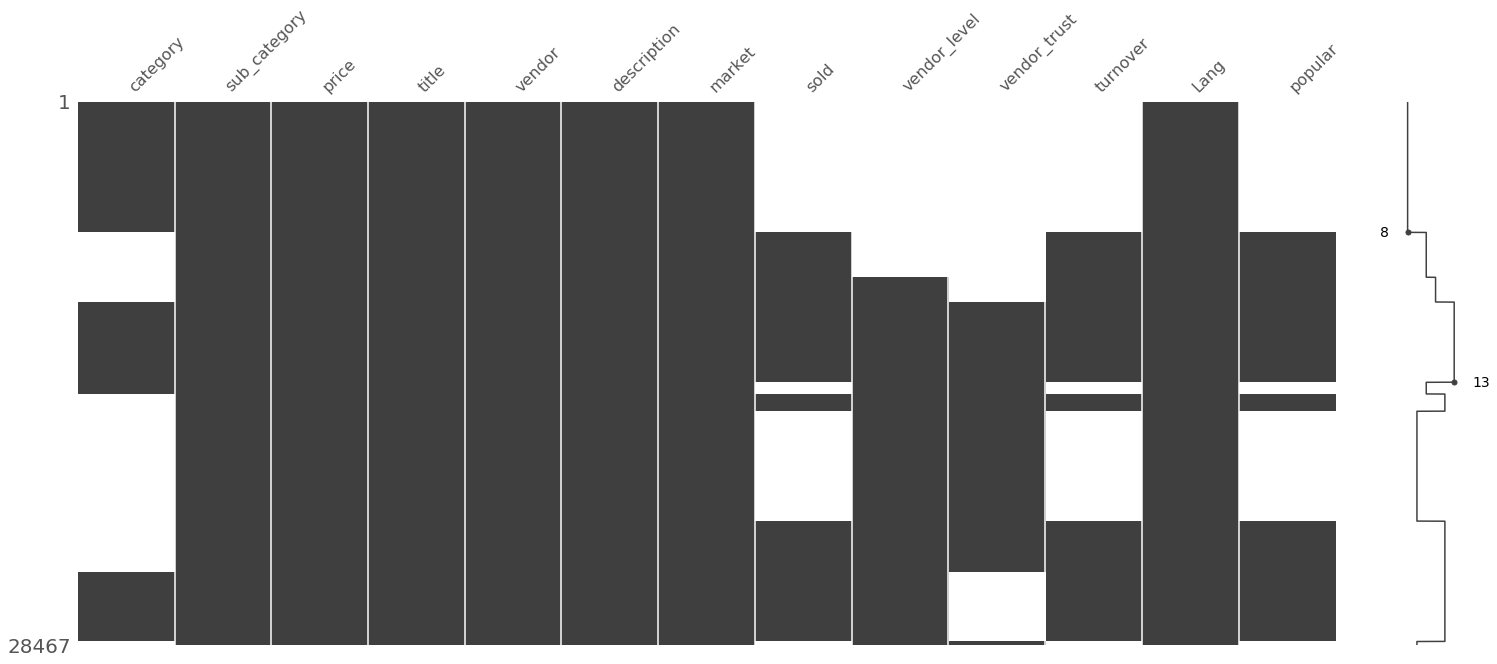

In [209]:
if df.isnull().any(axis=None):
    #print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    #print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [17]:
df = df.drop(columns=['link_product', 'link_vendor', 'views', 'date', 'terms', 'origin_country', 'last_seen'])

In [18]:
df.groupby('market').size()

market
asean      4043
bbm        1669
darkfox    1300
darknet    3629
deepsea    4210
empire     2690
hydra       204
icarus     4091
neptune    2352
torrez      615
versus      901
whm        2842
dtype: int64

In [19]:
df.groupby(['market', 'category']).size()

market   category         
asean    Digital goods        2966
         Fraud                1011
         None                   66
darknet  Digital Products     1436
         Fraud                2193
deepsea  Digital Products     2357
         Frauds               1853
torrez   Fraud                 615
whm      Online Businesses    2842
dtype: int64

In [20]:
df.groupby(['market', 'sub_category']).size()

market   sub_category         
asean    Bank accounts              18
         Credit cards               91
         Data                      732
         Fraud related             188
         Hacking                   444
         Information               203
         None                      448
         Other                    1111
         Security                    9
         Software                  256
         Tutorials                 543
darknet  Bank Accounts             205
         Bank Drops                114
         Credit Cards CVV          751
         Data Scans                182
         Dumps                     242
         None                     1436
         Online Accounts           699
deepsea  Accounts & Bank drops     358
         CVV's and Cards           236
         Dumps                      56
         Ebook                     815
         Exploits                   50
         Food Accounts              38
         Game keys               

In [21]:
df.groupby(['sub_category']).size()

sub_category
Accounts                   35
Accounts & Bank drops     358
Bank Accounts             208
Bank Drops                114
Bank Logins                39
Bank accounts              18
CVV & Credit Cards         10
CVV's and Cards           236
Carding Guides             19
Cards and CVV             148
Corporate Intel            25
Credit Cards                3
Credit Cards CVV          751
Credit cards               91
Crypto                      1
Data                      732
Data Scans                182
Databases                 100
Drops - Bank               16
Drops - Other              50
Dumps                     841
Ebook                     815
Emails                     13
Exploits                   50
Food Accounts              38
Fraud                      53
Fraud related             188
Fullz                       1
Game keys                   6
Hacking                   444
ID - Scans                104
Information               203
None                     21

In [22]:
df.groupby(['market'])['vendor'].agg('nunique')

market
asean       36
bbm         78
darkfox     34
darknet    127
deepsea    111
empire     135
hydra      204
icarus      37
neptune     23
torrez      14
versus      25
whm         88
Name: vendor, dtype: int64

In [23]:
# exchange rates registered in August 2020
USD = 1
EUR = 1.19387
GBP = 1.33645
CAD = 0.76684 
AUD = 0.7379
RUB = 0.0127510

def get_usd_value(text):
    # extract currency from text
    re_curr = re.findall('USD|EUR|GBP|CAD|AUD|RUB|\$|\€', text)
    
    if len(re_curr) > 0:
        # extract proper currency and value from text
        curr = re_curr[0].replace('$', 'USD').replace('€', 'EUR')
        value = float(text.replace(re_curr[0], '').replace(',', ''))
        
        if curr == 'EUR':
            conv = value * EUR
        elif curr == 'GBP':
            conv = value * GBP
        elif curr == 'CAD':
            conv = value * CAD
        elif curr == 'AUD':
            conv = value * AUD
        elif curr == 'RUB':
            conv = value * RUB
        else:
            conv = value * USD
        
        return round(conv, 2)
    else:
        return text

### Searching and removing outliers

In [24]:
df['price'] = df.apply(lambda row: get_usd_value(str(row['price'])), axis=1)
df['price'] = df.apply(lambda row: 0 if row['price'] == "None" or float(row['price']) > 10000000 else row['price'], axis=1)
df['price'] = df['price'].astype(float)
df

,category,sub_category,price,title,vendor,description,market,sold,vendor_level,vendor_trust
0,Online Businesses,Various Logins,9.55,timfuck.treasureislandmedia.com Porn Premium A...,enjoymyaccounts,"The gay men here are of the manly variety, wit...",whm,NaN,NaN,NaN
1,Online Businesses,Various Logins,476.35,10 UK bet365 verified accounts,cardpass,10 UK bet365 verified accounts,whm,NaN,NaN,NaN
2,Online Businesses,Various Logins,5.00,Masterclass All Access Plan + Annual Pass + Au...,proseller,Masterclass All Access Plan + Annual Pass + Au...,whm,NaN,NaN,NaN
3,Online Businesses,Other Fraud Related,28.00,Canada PASSPORT PSD TEMPLATE 19 LAYERS SCAN,empireshop,This listing include very very high quality NE...,whm,NaN,NaN,NaN
4,Online Businesses,Dumps,10.00,Pokebir.com Database (Plaintext),drunkdragon,Pokebir.com Database (Plaintext)\n\nWhy Buy fr...,whm,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31366,NaN,NaN,12.75,"ПРОБИВ ЛИЧНОСТИ (уголовка, административка)",КЕКЕРМИКИШМАЛЬ,"пробив личности на судимости, уголовные наказа...",hydra,NaN,750,4.8
31367,NaN,NaN,25.50,Взлом почты Mail.ru,"Zolton [взлом почты от 1000р, пробив от 100р,...",Пароль при взломе не меняется!\nСрок выполнени...,hydra,NaN,72,4.8
31368,NaN,NaN,12.75,база всех домофонов москвы,BLACK KENT,Всё домофоны москвы,hydra,NaN,212,4.8
31369,NaN,NaN,76.51,Ⴘдаленная настройка на анонимность ❄,Black Gallery corp.,Наши преимущества перед другими магазинами:\nВ...,hydra,NaN,424,4.8


In [25]:
df['price'].describe()

count    2.854600e+04
mean     1.055839e+02
std      7.418754e+03
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.111110e+06
Name: price, dtype: float64

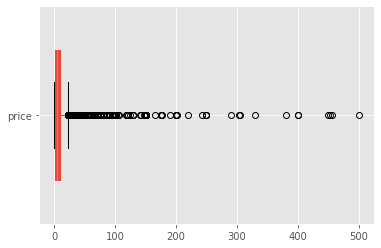

In [26]:
boxplot = df.loc[(df['price'] > 0) & (df['price'] < 500) & (df['sold'] > 0)].boxplot(column=['price'], vert=False, widths = 0.6, patch_artist = True)

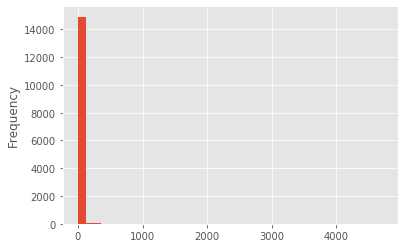

In [28]:
df['sold'].plot.hist(bins=40)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Units sold')

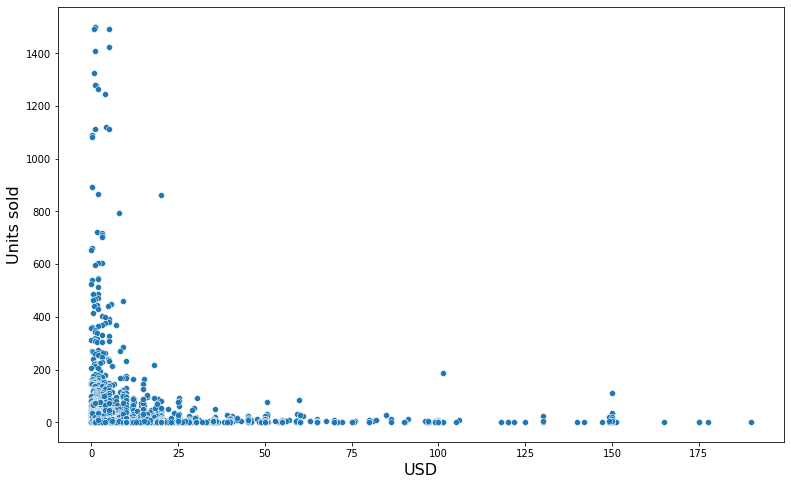

In [335]:
df2 = df.loc[(df['price'] > 0) & (df['price'] < 200) & (df['sold'] > 0)& (df['sold'] < 2000)]
scatter = sns.scatterplot('price', 'sold', data=df2)
scatter.set_xlabel('USD', fontsize=16)
scatter.set_ylabel('Units sold', fontsize=16)

In [30]:
correlation = df2[['price', 'sold']].corr()
correlation

,price,sold
price,1.000000,-0.077267
sold,-0.077267,1.000000


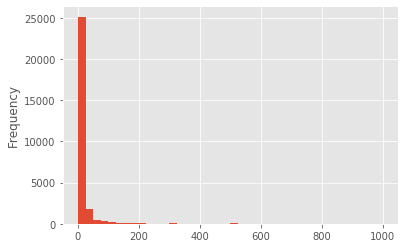

In [34]:
df.loc[df['price'] < 1000]['price'].plot.hist(bins=40)
plt.show()

In [56]:
df = df.loc[df['price'] < 1000]

In [57]:
df["sold"].value_counts()

0.0      9508
1.0      1211
2.0       641
3.0       613
4.0       401
         ... 
233.0       1
249.0       1
891.0       1
605.0       1
331.0       1
Name: sold, Length: 254, dtype: int64

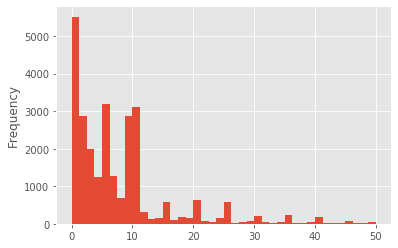

In [58]:
df.loc[df['price'] < 50]['price'].plot.hist(bins=40)
plt.show()

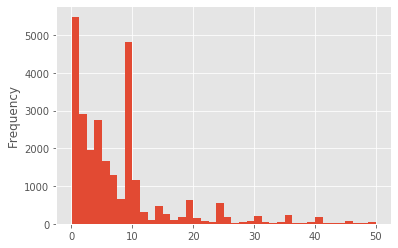

In [59]:
df.loc[(df['price'] > 0) & (df['price'] < 50)]['price'].plot.hist(bins=40)
plt.show()

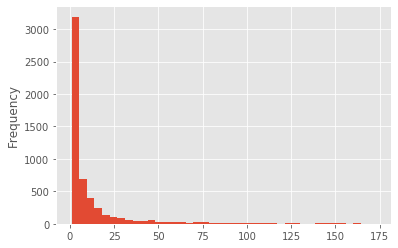

In [60]:
df.loc[(df['sold'] > 0) & (df['sold'] < 175)]['sold'].plot.hist(bins=40)
plt.show()

In [61]:
df.loc[(df['sold'] > 0) & (df['sold'] < 5)]['sold']

8312     1.0
8317     1.0
9069     1.0
9313     2.0
9316     1.0
        ... 
31019    2.0
31020    1.0
31022    1.0
31023    1.0
31024    1.0
Name: sold, Length: 2866, dtype: float64

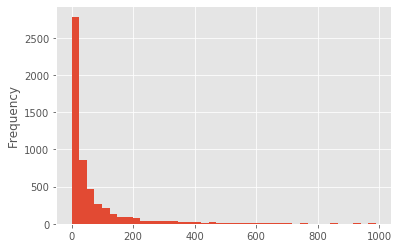

In [214]:
df['turnover'] = df['sold'] * df['price']
df.loc[(df['turnover'] > 0) & (df['turnover'] < 1000)]['turnover'].plot.hist(bins=40)
plt.show()

In [63]:
df.loc[(df['sold'] > 0)]['sold']

8312     1.0
8317     1.0
9069     1.0
9313     2.0
9316     1.0
        ... 
31019    2.0
31020    1.0
31022    1.0
31023    1.0
31024    1.0
Name: sold, Length: 5540, dtype: float64

In [64]:
df.loc[df['price']<200]['price']

0         9.55
2         5.00
3        28.00
4        10.00
5        20.00
         ...  
31366    12.75
31367    25.50
31368    12.75
31369    76.51
31370    12.75
Name: price, Length: 28160, dtype: float64

In [337]:
### remove NAN VALUES

In [65]:
df['title'] = df['title'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df['title'] = df['title'].astype(str)
df['description'] = df['description'].astype(str)
df['sub_category'] = df['sub_category'].astype(str)
df.dtypes


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

category         object
sub_category     object
price           float64
title            object
vendor           object
description      object
market           object
sold            float64
vendor_level     object
vendor_trust     object
turnover        float64
dtype: object

### Getting grasp of products offerend

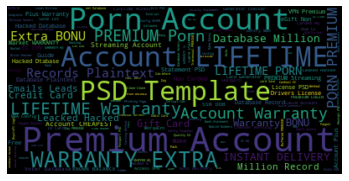

In [67]:
text = df['title']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

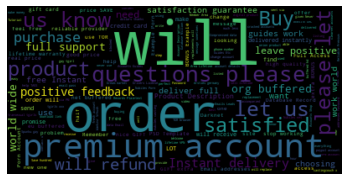

In [68]:
text = df['description']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
df.groupby('category').count()['title']

category
Digital Products     3786
Digital goods        2964
Fraud                3805
Frauds               1848
None                   66
Online Businesses    2809
Name: title, dtype: int64

In [70]:
df["sub_category"].value_counts()

nan                      13189
Other                     3360
None                      2161
Various Logins            1387
Dumps                      840
Ebook                      815
Credit Cards CVV           750
Data                       732
Online Accounts            699
Tutorials                  543
Other Fraud Related        508
Hacking                    443
Accounts & Bank drops      355
Software                   256
CVV's and Cards            235
Bank Accounts              203
Information                202
Porn                       189
Fraud related              185
Data Scans                 181
Templates                  179
Cards and CVV              147
SSN / DOB / Other PII      122
Bank Drops                 110
ID - Scans                 104
Databases                  100
Credit cards                91
Fraud                       53
Exploits                    50
Drops - Other               50
Bank Logins                 38
Food Accounts               38
Accounts

### Detecting language 

In [71]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df['Lang'] = df['description'].apply(det)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
df["Lang"].value_counts()

en       27793
ru         193
de          99
Other       71
fr          59
no          49
it          30
sv          29
ca          25
ro          17
pt          16
tl          13
nl          13
es          13
da           6
id           5
af           5
sk           4
bg           4
so           4
pl           4
et           4
lv           2
cy           2
sl           2
vi           2
sq           1
tr           1
cs           1
Name: Lang, dtype: int64

In [83]:
#df["origin_country"].value_counts()

In [74]:
print(df.loc[df['Lang'] == 'es']['description'])

1185                 Interracial real homemade porn films.
1794     www.putalocura.com\n\nPutalocura, Web numero u...
8949           Anal Ecstasy - A complete guide to Anal Sex
14613                     Product Description\nasdasdasdsa
18717    www.putalocura.com\n\nPutalocura, Web numero u...
21955                                     AVS Video Editor
22521                                 Hello Guys\nCCVERIFY
23134                                           Hello Guys
24564    URL: https://www.putalocura.com/\n\nPutalocura...
24994    Suite recupera numerosos datos de aplicaciones...
25297    Recupera todo tipo de archivos: mensajes, cont...
25935    La Frmula Illuminati Usada para Crear un Escla...
26041    El anlisis forense digital es el proceso de de...
Name: description, dtype: object


In [75]:
df.loc[df['sub_category'] == 'Tutorials']['title']

4040       [GET] FREE AIRPODS 2020 GUIDE | 100% SUCCESS 
4041       [GET] FREE AIRPODS 2020 GUIDE | 100% SUCCESS 
4042    2020 CARDING PRO TIPS! | DONT KILL YOUR CARDS   
4043               **15.000+ EASY CARDABLE WEBSITES**   
4120                 How To Succesfully Card On Walmart 
                              ...                       
6942          Paypal credit (Bill me later) usage guide 
6944                           Easy Amazon refund guide 
6946     MAKE $20k SELLING REPLICA PHONES LIKE ORIGINAL 
6947                                     How to make 500
6949          HOW TO CASH OUT CC TO BTC WORKING METHODS 
Name: title, Length: 543, dtype: object

In [80]:
df.to_pickle("df.pkl")

In [216]:
df3 = df.loc[((df['market'] == 'darkfox') | (df['market'] == 'torrez') | (df['market'] == 'deepsea') | (df['market'] == 'empire') | (df['market'] == 'darknet')) & (df['price'] < 2000) & (df['sold'] < 2000)].copy()
df3['vendor_level'] = df3.vendor_level.str.extract('(\d+)')
df3['vendor_level'] = df3['vendor_level'].astype('int32')
df3 = df3.loc[(df3['vendor_level'] < 8)] # only level 8 are tip jars
df3['vendor_level'].loc[(df3['market'] == 'empire')] = df3['vendor_level'].loc[(df3['market'] == 'empire')] / 7 * 5
df3['vendor_level'].loc[(df3['market'] == 'darknet')] = df3['vendor_level'].loc[(df3['market'] == 'darknet')] / 6 * 5
df3['vendor_level'] = df3['vendor_level'].round(0).astype(int)
df3['vendor_level'].value_counts()
#df3.loc[(df3['vendor_level'] == 5)]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1    3605
2    2867
3    2739
4    2336
5     245
Name: vendor_level, dtype: int64

In [ ]:
###### scatter = sns.scatterplot('vendor_level', 'sold', data=df3)
correlation = df3[['vendor_level', 'sold']].corr()

In [38]:
correlation

,vendor_level,sold
vendor_level,1.000000,0.105099
sold,0.105099,1.000000


In [232]:
df4 = df3.groupby(['vendor_level']).mean()[['price', 'sold']]

In [233]:
df4

,price,sold
vendor_level,,
1,23.947825,4.328433
2,22.650970,5.212766
3,11.220270,11.738591
4,7.776160,23.971747
5,3.410082,4.326531


In [234]:
df4.corr()

,price,sold
price,1.00000,-0.42093
sold,-0.42093,1.00000


In [295]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [334]:
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('default')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (13, 8) 

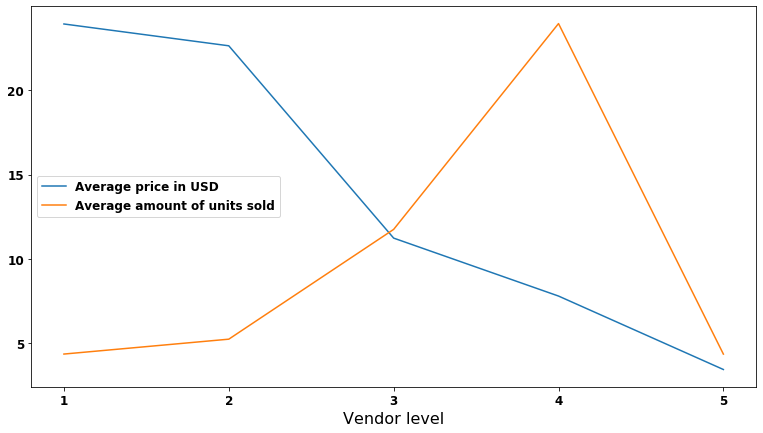

In [282]:

plt = df4.plot()
plt.set(
 ylabel= '')
plt.set_xlabel('Vendor level', fontsize=16)
plt.xaxis.set(ticks=range(1,6))
L=plt.legend()
L.get_texts()[0].set_text('Average price in USD')
L.get_texts()[1].set_text('Average amount of units sold')

In [43]:
df5 = df[['title', 'description']].copy()

In [44]:
df5['title_len'] = df5['title'].apply(lambda x: len(x))
df5['description_len'] = df5['description'].apply(lambda x: len(x))
df5['title_words'] = df5['title'].apply(lambda x: len(x.split()))
df5['description_words'] = df5['description'].apply(lambda x: len(x.split()))


In [45]:
df5.head()

,title,description,title_len,description_len,title_words,description_words
0,timfuck.treasureislandmedia.com Porn Premium A...,"The gay men here are of the manly variety, wit...",61,356,5,65
1,10 UK bet365 verified accounts,10 UK bet365 verified accounts,30,30,5,5
2,Masterclass All Access Plan + Annual Pass + Au...,Masterclass All Access Plan + Annual Pass + Au...,62,823,12,137
3,Canada PASSPORT PSD TEMPLATE 19 LAYERS SCAN,This listing include very very high quality NE...,43,491,7,77
4,Pokebir.com Database (Plaintext),Pokebir.com Database (Plaintext)\n\nWhy Buy fr...,32,457,3,85


In [46]:
df5.loc[df5['description_words']<5000].describe()

,title_len,description_len,title_words,description_words
count,28544.000000,28544.000000,28544.000000,28544.000000
mean,45.195488,961.067895,6.938726,143.966052
std,18.295081,1323.048611,3.228859,178.584772
min,1.000000,1.000000,1.000000,1.000000
25%,34.000000,264.000000,5.000000,42.000000
50%,43.000000,498.000000,6.000000,88.000000
75%,54.000000,979.000000,9.000000,161.000000
max,907.000000,32767.000000,153.000000,3181.000000


In [92]:
df = pd.read_pickle("df.pkl")
#df = df.loc[((df['market'] == 'darkfox') | (df['market'] == 'versus') | (df['market'] == 'deepsea') | (df['market'] == 'empire') | (df['market'] == 'darknet')) & (df['Lang'] == 'en')][['price', 'title', 'description', 'sold']]
df.loc[df['sold'] < 10, 'popular'] = 0 
df.loc[df['sold'] >= 10, 'popular'] = 1
#df.loc[df['popular'] == 1]

In [325]:
def create_corpus():
    corpus=[]
    
    for x in ebay['description'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [326]:
from collections import defaultdict
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))


corpus=create_corpus()

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

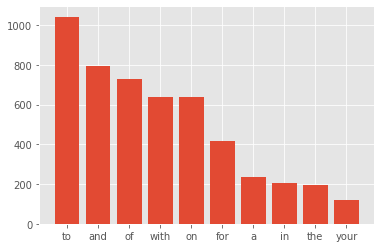

In [180]:
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 25 artists>

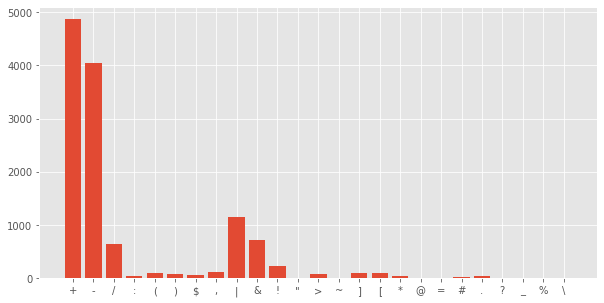

In [181]:
plt.figure(figsize=(10,5))
corpus=create_corpus()

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

In [331]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:80]:
    if (word.lower() not in stop) :
        x.append(word)
        y.append(count)

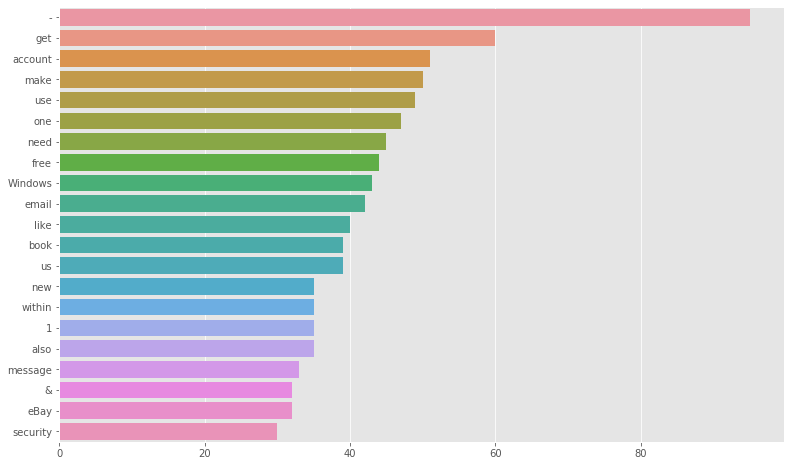

In [332]:
sns.barplot(x=y,y=x)

In [303]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

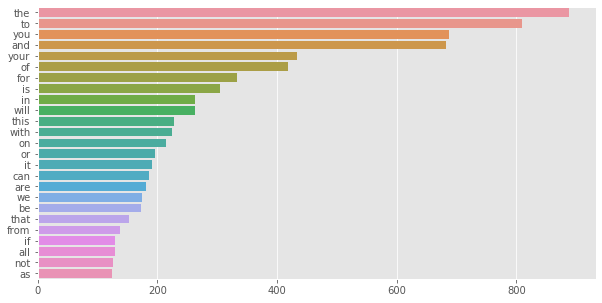

In [305]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(ebay['description'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

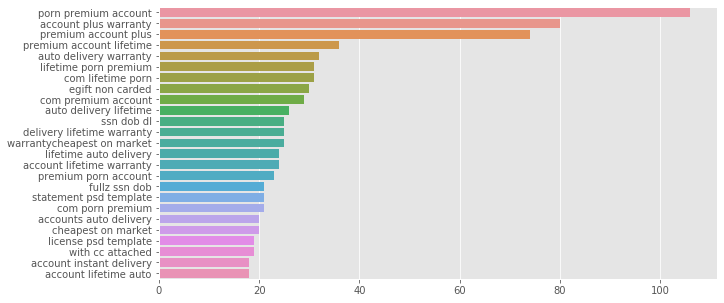

In [298]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df.loc[df['popular'] == 1]['title'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

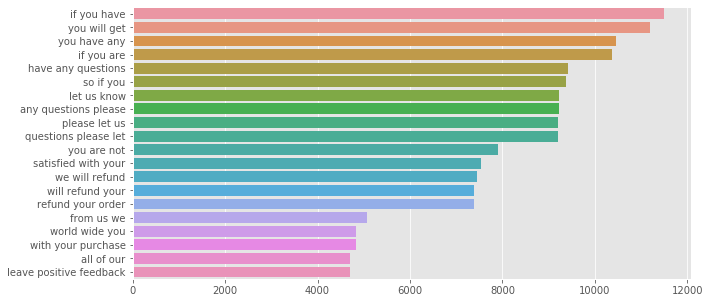

In [208]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['description'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)